<a href="https://colab.research.google.com/github/rohinikasarapu/SMART_IRRIGATION/blob/main/Irrigation_System_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
import joblib

In [40]:
# -------------------------------
# STEP 1: LOAD AND PREPROCESS DATA
# -------------------------------

# Load the dataset (update the filename accordingly)
df = pd.read_csv("irrigation_machine.csv")


In [41]:
# first 5 rows to be printed, df.tail()
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [43]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [44]:
# Basic statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,999.500000,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,577.494589,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,499.750000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,999.500000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,1499.250000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,1999.000000,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [45]:
# -------------------------------
# STEP 2: DEFINE FEATURES AND LABELS
# -------------------------------

X = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


y = df.iloc[:, 20:]

In [46]:
X.sample(10)

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18
1094,1094,0.0,1.0,1.0,6.0,0.0,2.0,0.0,9.0,0.0,2.0,1.0,3.0,6.0,5.0,4.0,0.0,0.0,0.0,1.0
734,734,2.0,1.0,5.0,0.0,4.0,3.0,3.0,4.0,0.0,4.0,2.0,4.0,5.0,3.0,2.0,1.0,4.0,3.0,0.0
976,976,3.0,5.0,3.0,1.0,3.0,0.0,2.0,4.0,0.0,0.0,4.0,5.0,10.0,3.0,2.0,0.0,1.0,1.0,0.0
547,547,2.0,0.0,2.0,3.0,4.0,1.0,2.0,4.0,0.0,1.0,5.0,5.0,9.0,3.0,4.0,0.0,1.0,2.0,2.0
1207,1207,1.0,1.0,1.0,3.0,1.0,6.0,8.0,3.0,1.0,4.0,0.0,1.0,1.0,1.0,3.0,2.0,4.0,0.0,3.0
989,989,1.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0,5.0,2.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0
1372,1372,2.0,2.0,1.0,2.0,2.0,0.0,0.0,6.0,0.0,3.0,5.0,3.0,6.0,2.0,9.0,0.0,3.0,1.0,1.0
703,703,4.0,1.0,2.0,2.0,3.0,3.0,0.0,4.0,1.0,2.0,3.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,4.0
650,650,1.0,1.0,0.0,4.0,1.0,3.0,1.0,6.0,0.0,1.0,4.0,7.0,7.0,8.0,6.0,2.0,1.0,0.0,4.0
229,229,1.0,3.0,1.0,5.0,5.0,0.0,0.0,7.0,1.0,3.0,1.0,1.0,7.0,10.0,3.0,1.0,1.0,0.0,3.0


In [47]:
y.sample(10)

,sensor_19,parcel_0,parcel_1,parcel_2
1579,4.0,0,0,0
831,5.0,1,1,0
530,1.0,1,1,0
1859,0.0,1,0,0
362,5.0,1,1,1
1100,0.0,0,1,0
998,3.0,1,1,0
1794,4.0,0,0,0
894,0.0,0,0,0
45,4.0,1,1,1


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [49]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_19  2000 non-null   float64
 1   parcel_0   2000 non-null   int64  
 2   parcel_1   2000 non-null   int64  
 3   parcel_2   2000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 62.6 KB


In [50]:
X

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0
1996,1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0
1997,1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0
1998,1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0


In [51]:
X.shape, y.shape

((2000, 20), (2000, 4))

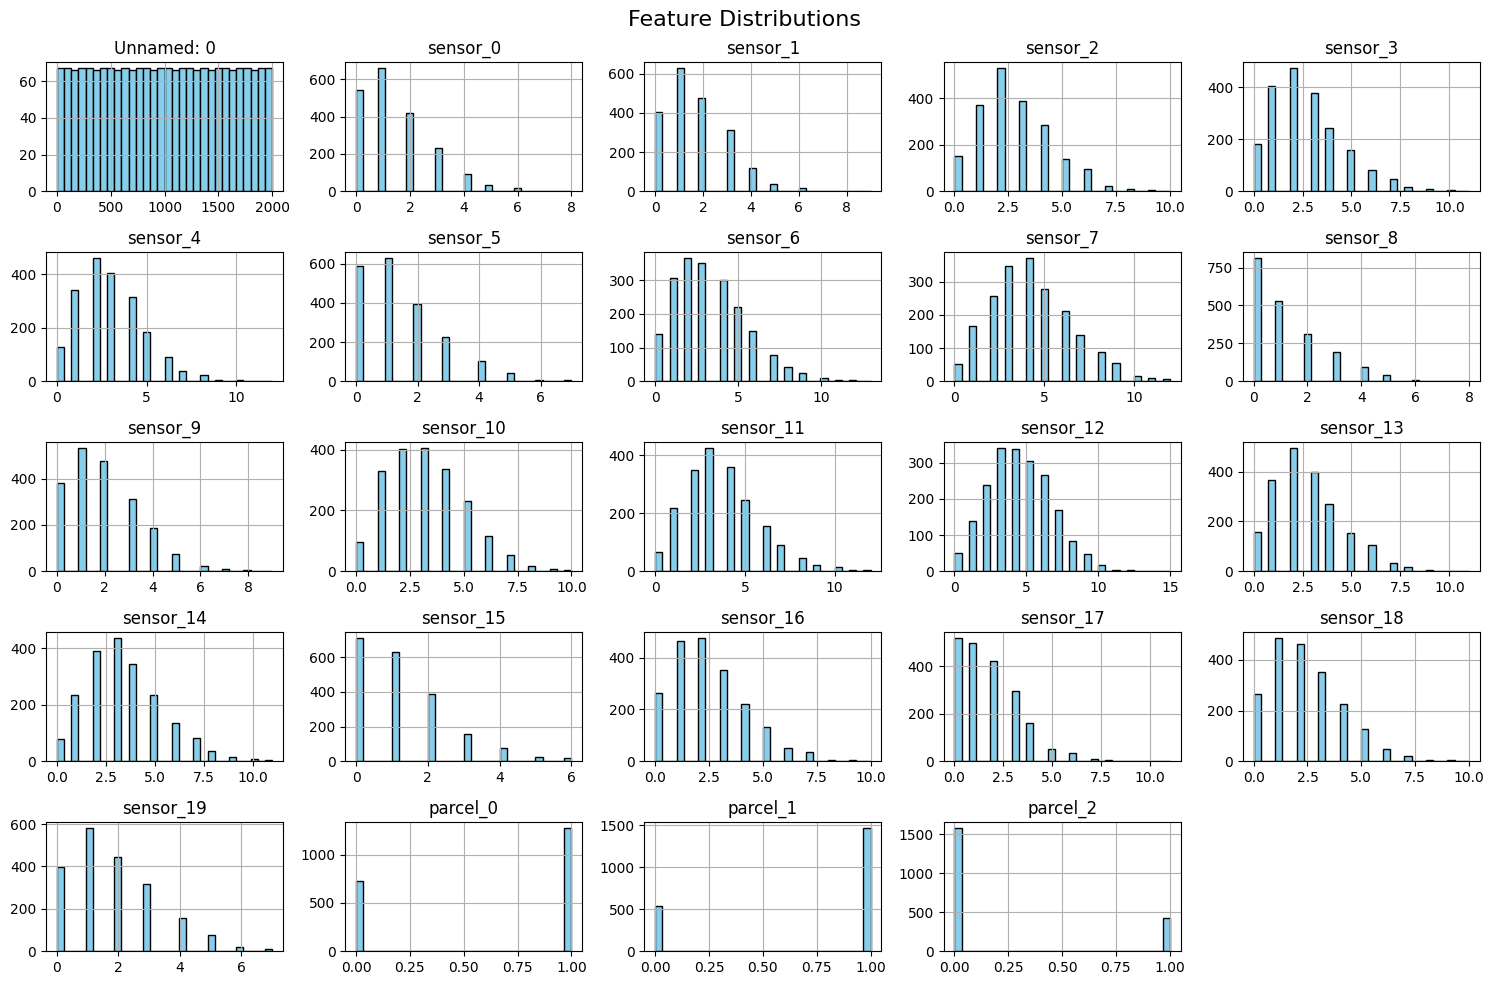

In [52]:
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [53]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 1.25000000e-01, 2.22222222e-01, ...,
        2.00000000e-01, 9.09090909e-02, 9.00000000e-01],
       [5.00250125e-04, 6.25000000e-01, 1.11111111e-01, ...,
        2.00000000e-01, 1.81818182e-01, 2.00000000e-01],
       [1.00050025e-03, 3.75000000e-01, 1.11111111e-01, ...,
        0.00000000e+00, 2.72727273e-01, 1.00000000e-01],
       ...,
       [9.98999500e-01, 1.25000000e-01, 3.33333333e-01, ...,
        4.00000000e-01, 3.63636364e-01, 1.00000000e-01],
       [9.99499750e-01, 2.50000000e-01, 1.11111111e-01, ...,
        2.00000000e-01, 0.00000000e+00, 3.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 1.11111111e-01, ...,
        0.00000000e+00, 4.54545455e-01, 2.00000000e-01]])

In [62]:
# -------------------------------
# STEP 3: TRAIN-TEST SPLIT
# -------------------------------

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600, 4), (400, 4))

In [64]:
# -------------------------------
# STEP 4: TRAIN CLASSIFIER
# -------------------------------

# Use MultiOutputClassifier to handle multi-label classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Custom hyperparameters for RandomForest
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=10,             # Maximum depth of each tree
    min_samples_split=4,      # Minimum samples to split a node
    min_samples_leaf=2,       # Minimum samples per leaf
    max_features='sqrt',      # Number of features to consider at each split ('auto', 'sqrt', 'log2', or int)
    random_state=42
)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(rf)

# Train the model
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

In [72]:
# -------------------------------
# STEP 5: EVALUATE MODEL
# -------------------------------
from sklearn.metrics import classification_report

# Make sure y_test is a DataFrame, y_pred is a NumPy array
for i, label in enumerate(y.columns):
    print(f"\n🔹 Classification Report for Label: {label}")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))



🔹 Classification Report for Label: sensor_19
              precision    recall  f1-score   support

         0.0       0.41      0.23      0.29        79
         1.0       0.30      0.60      0.40       125
         2.0       0.19      0.24      0.21        76
         3.0       0.17      0.02      0.03        60
         4.0       0.00      0.00      0.00        27
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         3

    accuracy                           0.28       400
   macro avg       0.13      0.14      0.12       400
weighted avg       0.23      0.28      0.23       400


🔹 Classification Report for Label: parcel_0
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       144
           1       0.85      0.93      0.89       256

    accuracy                           0.85       400
   macro avg       0.86      0.82      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


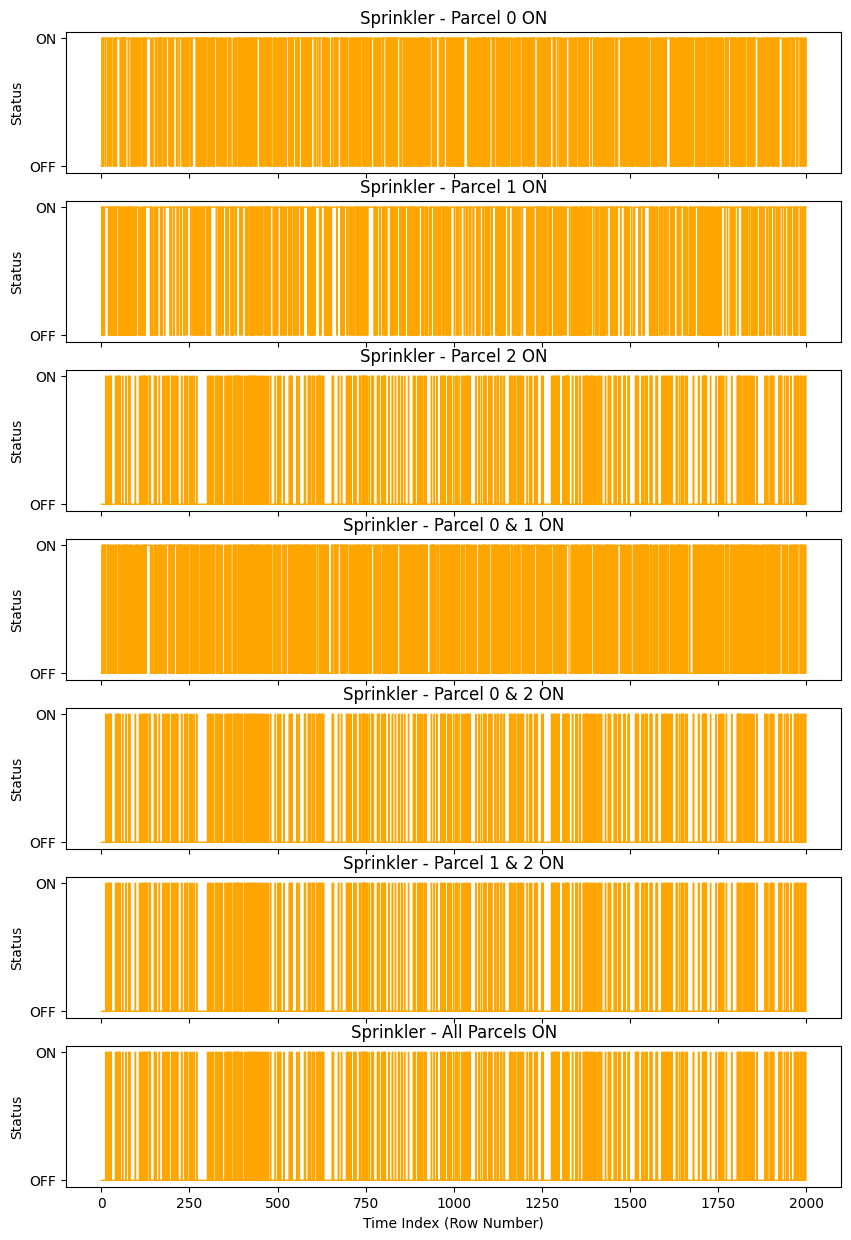

In [75]:
import matplotlib.pyplot as plt

# Define parcel activation conditions with descriptive labels
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

# Create vertically stacked subplots (one for each condition)
fig, axs = plt.subplots(nrows=len(conditions), figsize=(10,15), sharex=True)

# Loop through each condition to plot corresponding square wave
for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='orange')
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])


# Label x-axis on the last subplot
axs[-1].set_xlabel("Time Index (Row Number)")

# Plot
plt.show()


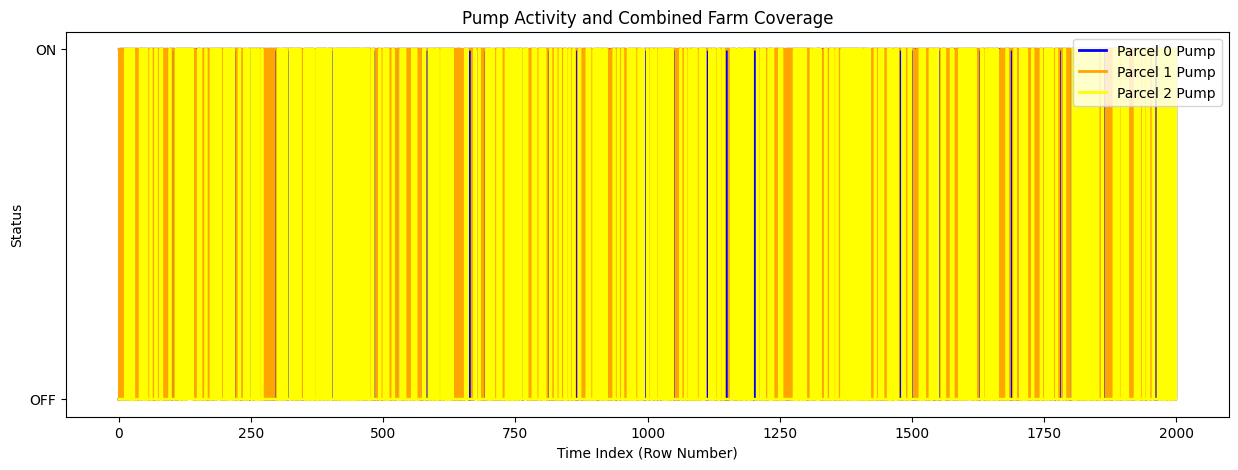

In [80]:
# Calculate combined activity of all pumps (overlap)
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))

# Plot individual pump statuses
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='yellow')

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()


In [81]:
import joblib
from sklearn.pipeline import Pipeline

joblib.dump(model, "Farm_Irrigation_System.pkl")

['Farm_Irrigation_System.pkl']